In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel('D:/Data Sets/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [3]:
df_copy = df.copy()

Dataset statistics

In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


Understanding data better

Check for missing values

In [6]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Dropped all rows with missing values

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Find outliers

<AxesSubplot:>

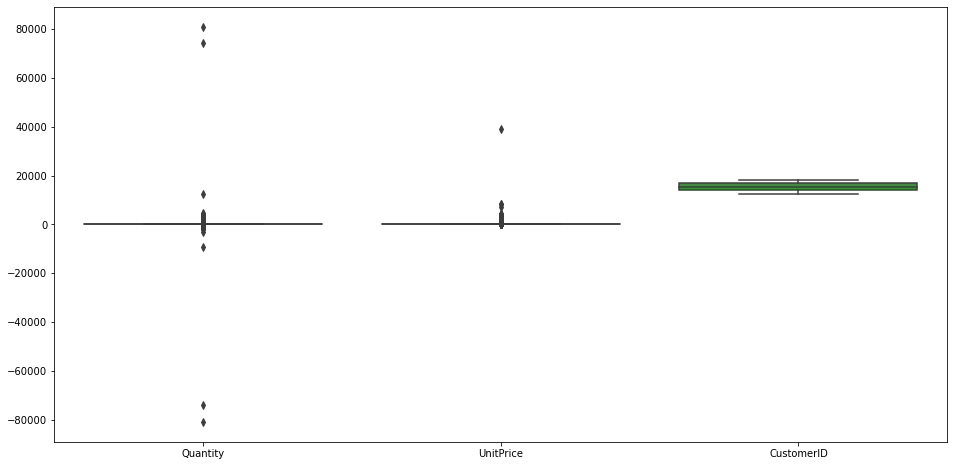

In [9]:
fig, ax = plt.subplots(figsize=(16,8))
sns.boxplot(data=df)

We saw we have quantities and unit price less than 0, these values do not contribute to our goals that is segmenting customers based 
on their purchase behaviours. So, we drop them

In [10]:
#df['Quantity'][df.Quantity < 0]
#df['UnitPrice'][df.UnitPrice < 0]
df.drop(index=df['Quantity'][df.Quantity < 0].index, inplace=True)
df.drop(index=df['UnitPrice'][df.UnitPrice < 0].index, inplace=True)

In [11]:
#Uk has the more observations so we will go with UK and different countries will have effect on clustering
df = df[df.Country == "United Kingdom"]
df.reset_index(inplace=True)

Feature Engineering

In [12]:
#we will create a different column 
df['Revenue'] = df['Quantity']*df['UnitPrice']

In [13]:
date = str(pd.to_datetime(df.InvoiceDate)[0].year) +'-' + str(pd.to_datetime(df.InvoiceDate)[0].month)

In [14]:
import datetime as dt
df['InvoiceTime'] = df['InvoiceDate'].map(lambda x : x.time() )
df['InvoiceYearMonth'] = df['InvoiceDate'].dt.strftime('%Y-%m')
df['Date'] = df['InvoiceDate'].map(lambda x : x.date() )

In [15]:
df.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,InvoiceTime,InvoiceYearMonth,Date
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,08:26:00,2010-12,2010-12-01
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,2010-12,2010-12-01
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,08:26:00,2010-12,2010-12-01
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,2010-12,2010-12-01
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,08:26:00,2010-12,2010-12-01


<AxesSubplot:xlabel='InvoiceYearMonth', ylabel='Quantity'>

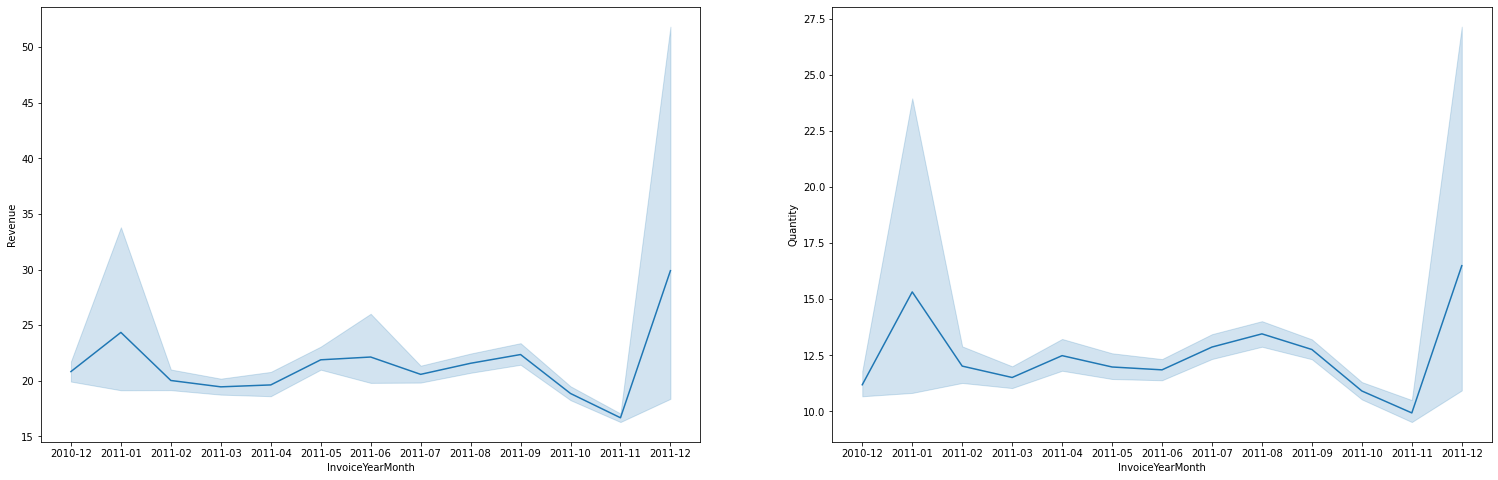

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols=2, figsize=(26,8))
sns.lineplot(data=df, x = 'InvoiceYearMonth', y = 'Revenue', markers='point', ax = ax[0])
sns.lineplot(data=df, x = 'InvoiceYearMonth', y = 'Quantity', markers = 'o', ax = ax[1])
#plt.plot(df.InvoiceYearMonth, df.Quantity)

In [17]:
df['Quantity'][df['Quantity']>df.Quantity.quantile(0.99)]

76          120
156         192
157         192
158         192
159         432
          ...  
353987    80995
354007      120
354063      180
354220      144
354229      144
Name: Quantity, Length: 3289, dtype: int64

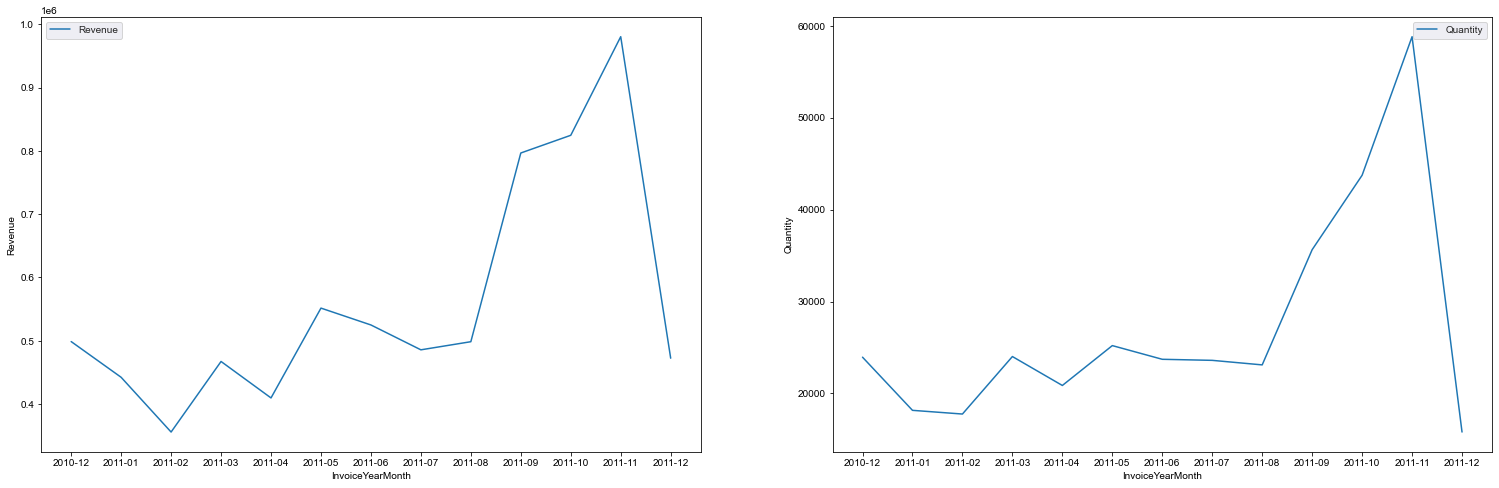

In [18]:
rev_data = df.groupby('InvoiceYearMonth')['Revenue'].sum().reset_index()
Qty_data = df.groupby('InvoiceYearMonth')['Quantity'].count().reset_index()
fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(26,8))
sns.set_style('darkgrid')
sns.lineplot(data=rev_data, x = rev_data.InvoiceYearMonth, y = rev_data.Revenue,label = 'Revenue', ax = ax[0] )
sns.lineplot(data=Qty_data, x = Qty_data.InvoiceYearMonth, y = Qty_data.Quantity, label = 'Quantity', ax = ax[1] )
plt.legend()

RFM analysis

The first thing in RFM is Recency. We will find the most recent date i.e. the date of last purchase and will use it as refernece

In [19]:
recent_date = df['InvoiceDate'].max().date()

In [20]:
df_recent = df.groupby('CustomerID', as_index=False)['Date'].max()
df_recent.rename({'Date':'RecentPurchaseDate'}, axis=1, inplace=True)

Now we will calculate the days since last purchase for each customer id

In [21]:

df_recent['Recency'] = (recent_date - df_recent['RecentPurchaseDate']).astype('str').map(lambda x: str(x).strip(' days'))
df_recent['Recency'] = df_recent['Recency'].astype('int')

We will now group for frequency and Revenue

In [22]:
df_FM = df.groupby('CustomerID', as_index=False)['InvoiceNo'].count()


In [23]:
df_FM['RevPerHead'] = df.groupby('CustomerID', as_index=False)['Revenue'].sum()['Revenue']

In [24]:
df_RFM = df_recent.merge(df_FM)

In [25]:
df_RFM.head()

,CustomerID,RecentPurchaseDate,Recency,InvoiceNo,RevPerHead
0,12346.0,2011-01-18,325,1,77183.60
1,12747.0,2011-12-07,2,103,4196.01
2,12748.0,2011-12-09,0,4596,33719.73
3,12749.0,2011-12-06,3,199,4090.88
4,12820.0,2011-12-06,3,59,942.34


In [26]:
quantiles = df_RFM.quantile([0.25,0.50, 0.75])
#quantiles = quantiles.to_dict()

Define function for R, F and M

In [27]:
def recency_func(x,key,d):
    if x <= d[key][0.25]:
        return 1
    elif x<=d[key][0.50]:
        return 2
    elif x<=d[key][0.75]:
        return 3
    else:
        return 4

def FreqMoney(x,key,d):
    if x <= d[key][0.25]:
        return 4
    elif x<=d[key][0.50]:
        return 3
    elif x<=d[key][0.75]:
        return 2
    else:
        return 1

Assign RFM values

In [28]:
df_RFM['R_quartile'] = df_RFM['Recency'].apply(recency_func, args=('Recency',quantiles))
df_RFM['F_quartile'] = df_RFM['InvoiceNo'].apply(FreqMoney, args = ('InvoiceNo', quantiles))
df_RFM['M_quartile'] = df_RFM['RevPerHead'].apply(FreqMoney, args = ('RevPerHead', quantiles))

In [29]:
df_RFM

,CustomerID,RecentPurchaseDate,Recency,InvoiceNo,RevPerHead,R_quartile,F_quartile,M_quartile
0,12346.0,2011-01-18,325,1,77183.60,4,4,1
1,12747.0,2011-12-07,2,103,4196.01,1,1,1
2,12748.0,2011-12-09,0,4596,33719.73,1,1,1
3,12749.0,2011-12-06,3,199,4090.88,1,1,1
4,12820.0,2011-12-06,3,59,942.34,1,2,2
...,...,...,...,...,...,...,...,...
3916,18280.0,2011-03-07,277,10,180.60,4,4,4
3917,18281.0,2011-06-12,180,7,80.82,4,4,4
3918,18282.0,2011-12-02,7,12,178.05,1,4,4
3919,18283.0,2011-12-06,3,756,2094.88,1,1,1


In [30]:
df_RFM['RFM_segment'] = df_RFM['R_quartile'].map(str) + df_RFM['F_quartile'].map(str) + df_RFM['M_quartile'].map(str)

In [31]:
df_RFM.head(3)

,CustomerID,RecentPurchaseDate,Recency,InvoiceNo,RevPerHead,R_quartile,F_quartile,M_quartile,RFM_segment
0,12346.0,2011-01-18,325,1,77183.60,4,4,1,441
1,12747.0,2011-12-07,2,103,4196.01,1,1,1,111
2,12748.0,2011-12-09,0,4596,33719.73,1,1,1,111


In [32]:
df_RFM['RFM_score'] = df_RFM['R_quartile'] + df_RFM['F_quartile'] + df_RFM['M_quartile']

In [33]:
df_RFM.head()

,CustomerID,RecentPurchaseDate,Recency,InvoiceNo,RevPerHead,R_quartile,F_quartile,M_quartile,RFM_segment,RFM_score
0,12346.0,2011-01-18,325,1,77183.60,4,4,1,441,9
1,12747.0,2011-12-07,2,103,4196.01,1,1,1,111,3
2,12748.0,2011-12-09,0,4596,33719.73,1,1,1,111,3
3,12749.0,2011-12-06,3,199,4090.88,1,1,1,111,3
4,12820.0,2011-12-06,3,59,942.34,1,2,2,122,5


In [34]:
df_RFM.rename({'InvoiceNo':'Frequency'}, axis=1, inplace=True)

In [35]:
df_RFM.head()

,CustomerID,RecentPurchaseDate,Recency,Frequency,RevPerHead,R_quartile,F_quartile,M_quartile,RFM_segment,RFM_score
0,12346.0,2011-01-18,325,1,77183.60,4,4,1,441,9
1,12747.0,2011-12-07,2,103,4196.01,1,1,1,111,3
2,12748.0,2011-12-09,0,4596,33719.73,1,1,1,111,3
3,12749.0,2011-12-06,3,199,4090.88,1,1,1,111,3
4,12820.0,2011-12-06,3,59,942.34,1,2,2,122,5


K-Means Clustering
Assumptions for K-means
1. Normally distributed data
2. Standardised data

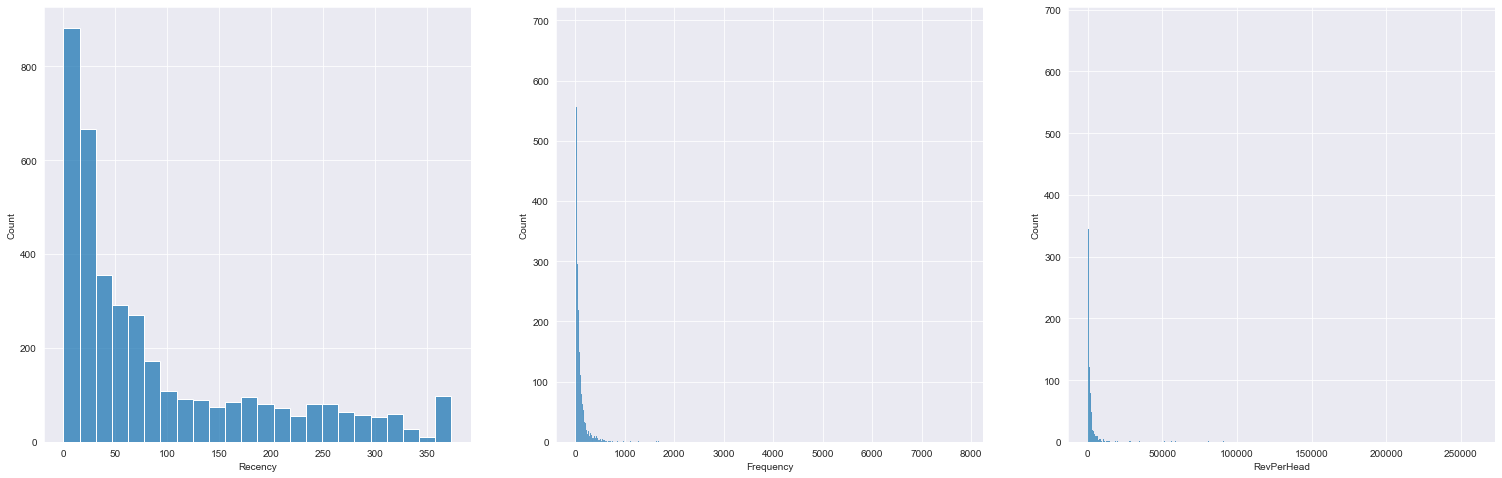

In [36]:
#check for normal distribution
fig, ax = plt.subplots(figsize=(26,8), nrows=1, ncols=3)
for i,col in enumerate(['Recency', 'Frequency', 'RevPerHead']):
    sns.histplot( x = df_RFM[col], ax=ax[i])

Well, it is clear our variables do not follow normal distribution. So, we will perform a log transform to make it close to normal distribution

In [37]:
df_rfm_log = (df_RFM[['Recency', 'Frequency', 'RevPerHead']]+1).apply(np.log, axis=1).round(3)
#added 1 as there are 0's so it will not be inf
df_rfm_log.head(3)



,Recency,Frequency,RevPerHead
0,5.787,0.693,11.254
1,1.099,4.644,8.342
2,0.000,8.433,10.426


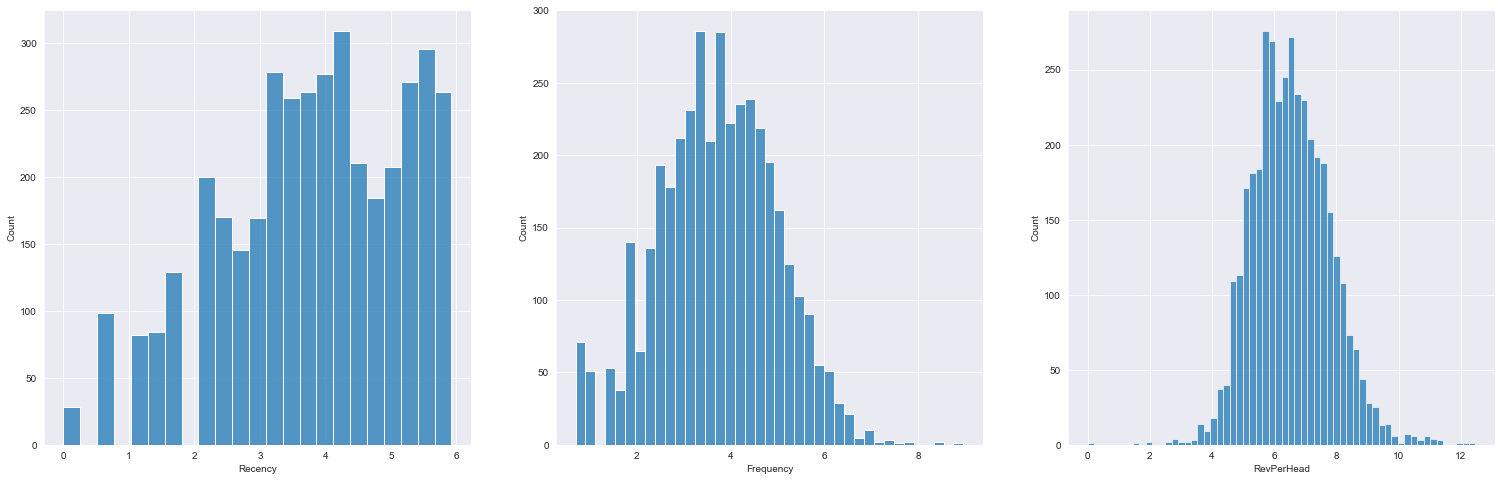

In [38]:
fig, ax = plt.subplots(figsize=(26,8), nrows=1, ncols=3)
for i,col in enumerate(['Recency', 'Frequency', 'RevPerHead']):
    sns.histplot( x = df_rfm_log[col], ax=ax[i])

Standardizing

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df_rfm_log)
rfm_scaled = scaler.transform(df_rfm_log)


In [40]:
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=df_rfm_log.columns)
rfm_scaled_df.head(3)

,Recency,Frequency,RevPerHead
0,1.438782,-2.401498,3.774437
1,-1.953138,0.732382,1.440609
2,-2.748300,3.737765,3.110835


Elbow method and Silhoutte Score to find ideal K  

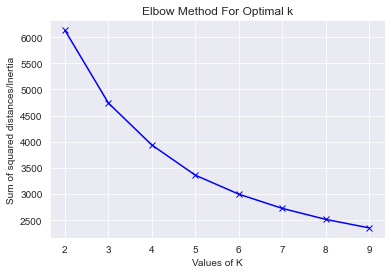

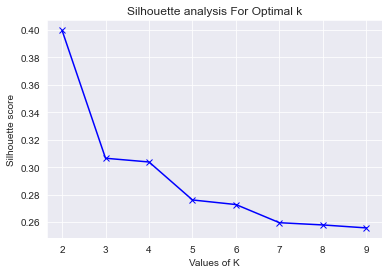

In [41]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
distance = []
silht_avg = []
k = range(2,10)
for num_cluster in k:

    model = KMeans(n_clusters=num_cluster)
    model.fit(rfm_scaled_df)
    distance.append(model.inertia_)
    cluster_labels = model.labels_
    x = silhouette_score(rfm_scaled_df, cluster_labels)
    silht_avg.append(x)

plt.plot(k,distance,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

plt.plot(k,silht_avg,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.title('Silhouette analysis For Optimal k')
plt.show()

In [43]:
df_RFM

,CustomerID,RecentPurchaseDate,Recency,Frequency,RevPerHead,R_quartile,F_quartile,M_quartile,RFM_segment,RFM_score
0,12346.0,2011-01-18,325,1,77183.60,4,4,1,441,9
1,12747.0,2011-12-07,2,103,4196.01,1,1,1,111,3
2,12748.0,2011-12-09,0,4596,33719.73,1,1,1,111,3
3,12749.0,2011-12-06,3,199,4090.88,1,1,1,111,3
4,12820.0,2011-12-06,3,59,942.34,1,2,2,122,5
...,...,...,...,...,...,...,...,...,...,...
3916,18280.0,2011-03-07,277,10,180.60,4,4,4,444,12
3917,18281.0,2011-06-12,180,7,80.82,4,4,4,444,12
3918,18282.0,2011-12-02,7,12,178.05,1,4,4,144,9
3919,18283.0,2011-12-06,3,756,2094.88,1,1,1,111,3


In [44]:
df_RFM_new = df_RFM.drop(['RecentPurchaseDate'], axis=1)

From above we saw 3 seems to be the ideal choice but let's now visualize clusters for K = 3,4,5

In [63]:
from sklearn.manifold import TSNE
def kmeans(normalised_df_rfm, clusters_number, original_df_rfm, ):
    
    kmeans = KMeans(n_clusters = clusters_number, random_state = 1)
    kmeans.fit(normalised_df_rfm)
    # Extract cluster labels
    cluster_labels = kmeans.labels_
        
    # Create a cluster label column in original dataset
    df_new = original_df_rfm.assign(Cluster = cluster_labels)
    
    # Initialise TSNE
    model = TSNE(random_state=1)
    transformed = model.fit_transform(df_new)
    
    # Plot t-SNE
    #ax.title.set_text('Flattened Graph of {} Clusters'.format(clusters_number))
    plt.title('Flattened Graph of {} Clusters'.format(clusters_number))
    sns.scatterplot(x=transformed[:,0], y=transformed[:,1], hue=cluster_labels, style=cluster_labels, palette="Set1",)
    
    return df_new
#plt.figure(figsize=(10, 10))
#plt.subplot(3, 1, 1)
#df_rfm_k3 = kmeans(rfm_scaled_df, 3, df_RFM_new)
#plt.subplot(3, 1, 1)
#df_rfm_k4 = kmeans(rfm_scaled_df, 4, df_RFM_new)
#plt.subplot(3, 1, 1)
#df_rfm_k5 = kmeans(rfm_scaled_df, 5, df_RFM_new)

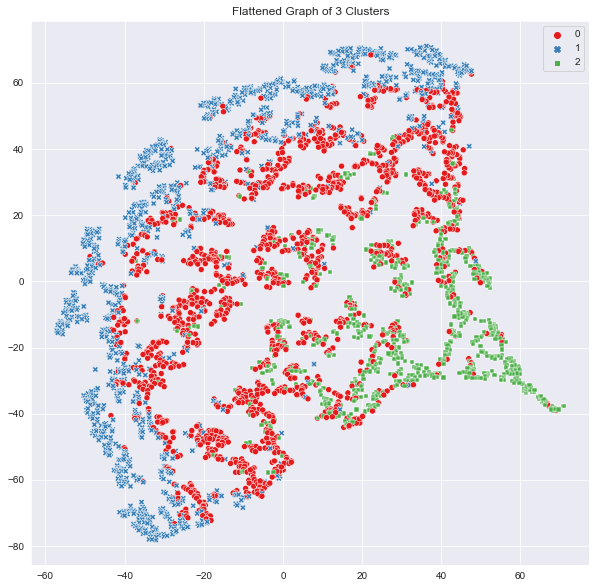

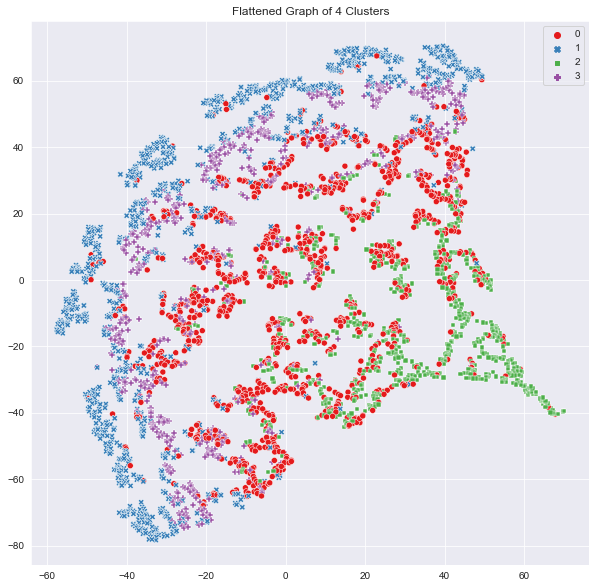

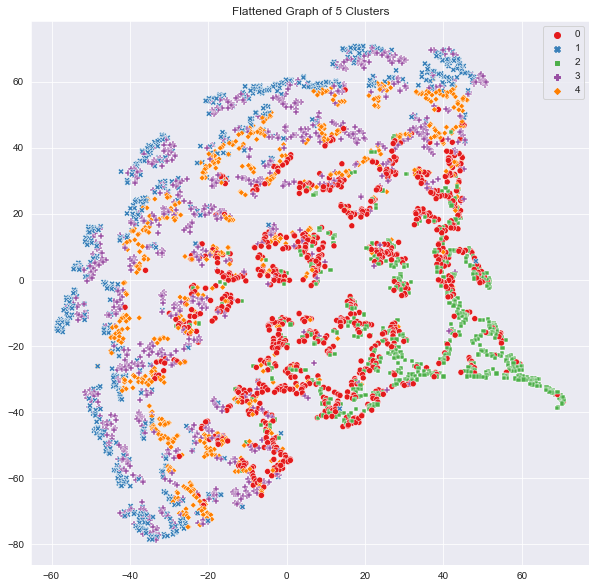

In [65]:
plt.figure(figsize=(10, 10))
df_rfm_k3 = kmeans(rfm_scaled_df, 3, df_RFM_new)
plt.show()
plt.figure(figsize=(10, 10))
df_rfm_k4 = kmeans(rfm_scaled_df, 4, df_RFM_new)
plt.show()
plt.figure(figsize=(10, 10))
df_rfm_k5 = kmeans(rfm_scaled_df, 5, df_RFM_new)
plt.show()

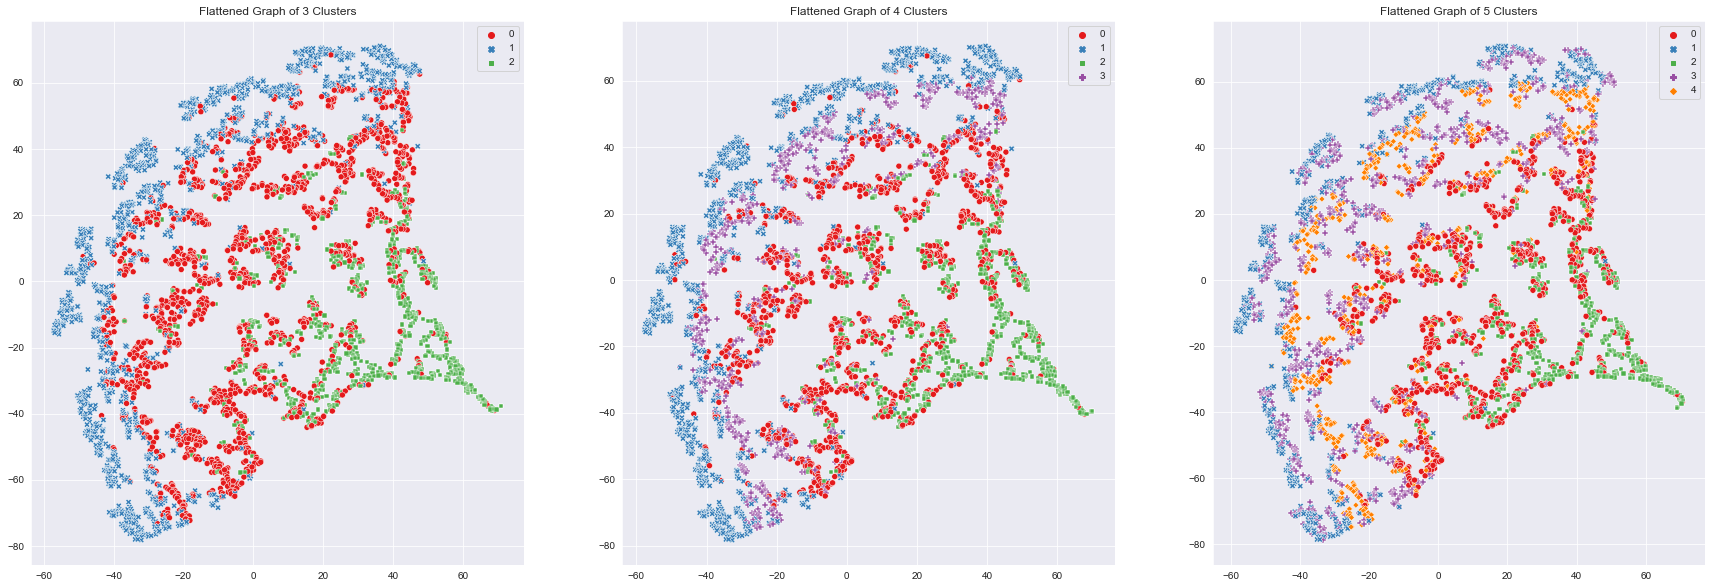

In [54]:
fig, ax = plt.subplots(figsize = (30, 10), nrows=1, ncols=3)
for i,k in enumerate([3,4,5]):
    kmeans(rfm_scaled_df, k, df_RFM_new, ax[i] )


Snake Plots

In [68]:
def snake_plot(normalised_df_rfm, df_rfm_kmeans, df_rfm_original):
    normalised_df_rfm = pd.DataFrame(normalised_df_rfm, 
                                           index=df_rfm_original.index, 
                                           columns=df_rfm_original.columns)
    normalised_df_rfm['Cluster'] = df_rfm_kmeans['Cluster']
    # Melt data into long format
    df_melt = pd.melt(normalised_df_rfm.reset_index(), 
                            id_vars=['CustomerID', 'Cluster'],
                            value_vars=['Recency', 'Frequency', 'RevPerHead'], 
                            var_name='Metric', 
                            value_name='Value')
    plt.xlabel('Metric')
    plt.ylabel('Value')
    sns.pointplot(data=df_melt, x='Metric', y='Value', hue='Cluster')
    
    return

[]

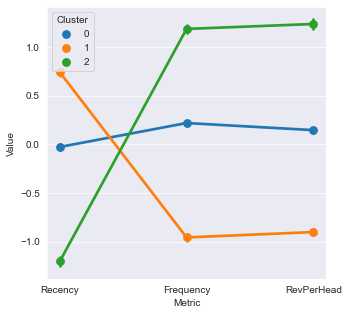

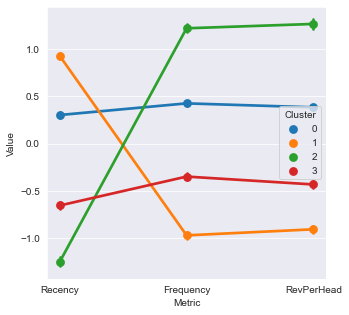

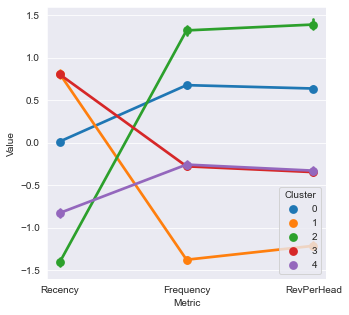

In [72]:
plt.figure(figsize=(5, 5))
snake_plot(rfm_scaled_df,df_rfm_k3,df_RFM_new)
plt.plot()
plt.figure(figsize=(5, 5))
snake_plot(rfm_scaled_df,df_rfm_k4,df_RFM_new)
plt.plot()
plt.figure(figsize=(5, 5))
snake_plot(rfm_scaled_df,df_rfm_k5,df_RFM_new)
plt.plot()

The number of clusters depends on business needs. Here, we showed behaviour of customers from different segments as per Recency, Frequency and Monetary value

Summarizing clustering

In [80]:
def rfm_values(df):
    df_new = df.groupby(['Cluster']).agg({
        'Recency': 'mean',
        'Frequency': 'mean',
        'RevPerHead': ['mean', 'count']
    }).round(0)
    
    return df_new
final_df = rfm_values(df_rfm_k3)
final_df

Recency Frequency RevPerHead      
           mean      mean       mean count
Cluster                                   
0          65.0      67.0     1146.0  1659
1         170.0      15.0      290.0  1422
2          13.0     264.0     5948.0   840

So, from the above summary table we can conclude that cluster 0 represents the moderate category i.e. customers with middle level RFM values.
Cluster 1 comprises of customers who are just somehow stumbled upon the platform and haven't purchased frequently. So, it is expected their revenue per head will be less.
The final or Cluster 3 consists of customers loyal to the platform they buy frequently and regularly with high per capita revenue.